# Programming Assignment 1

### EC184604 - Computer Vision
### Deadline: 28 March 2019

<div style="font-weight:bold;font-family:courier;font-size:12pt">
Name : Vito Rihaldijiran<br/>
NRP &nbsp;: 07211840000071
    </div>

### [15pt] Gaussian Filtering (a.k.a Blurring Effect)
In this section, you required to implement the blurring effect that we discussed in the class. You must use the Gaussian filter instead of standard blur filter. Please provide your own image. You can use numpy-scipy only implementation or opencv library implementation (preferred) for this assignment. You also need to display the image before and after the Gaussian filter is applied. As summary, if you want to get maximum score you must:
- Use Gaussian filter
- Display image before and after the Gaussian filtering proceess
- Try several different Sigma value on Gaussian filter parameter

Reference: 
- [OpenCV implementation] https://docs.opencv.org/3.4.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1
- [Numpy-Scipy implementation] http://scipy-lectures.org/advanced/image_processing/#blurring-smoothing

Text(0.5, 1.0, 'sigma = 10')

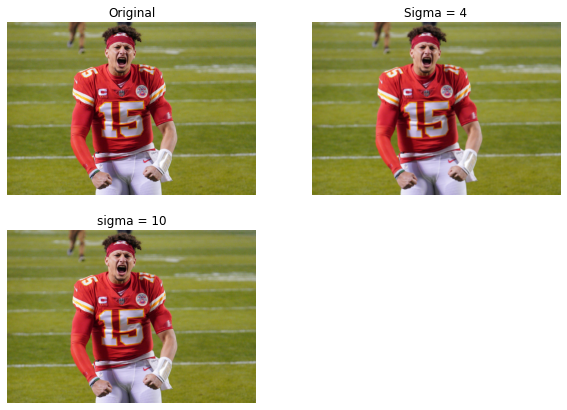

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

plt.ion()

img = cv2.imread('chelse.jpeg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blur_1 = cv2.GaussianBlur(rgb_img,(11,11),4)
blur_2 = cv2.GaussianBlur(rgb_img,(11,11),1)


fig = plt.figure(figsize=(10, 7))
  
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
  
plt.imshow(rgb_img)
plt.axis('off')
plt.title("Original")
  
fig.add_subplot(rows, columns, 2)
  
plt.imshow(blur_1)
plt.axis('off')
plt.title("Sigma = 4")
  
fig.add_subplot(rows, columns, 3)
  
plt.imshow(blur_2)
plt.axis('off')
plt.title("sigma = 10")

### [15pt] Pyramid Image Generation

In this assignment you need to implementing the pyramid image generation process, as we discussed in the class. Same as previous assignment, you can use either the scipy-numpy implementation or OpenCV implementation. If you want to get maximum score, you must
- Use color image instead of grayscale
- Show the original image
- Show the pyramid image 
- Try several different pyramid level

Reference:
- [OpenCV-Pyramid Image] https://docs.opencv.org/3.4.0/d4/d1f/tutorial_pyramids.html
- [Scipy-Numpy Pyramid Image] !No reference

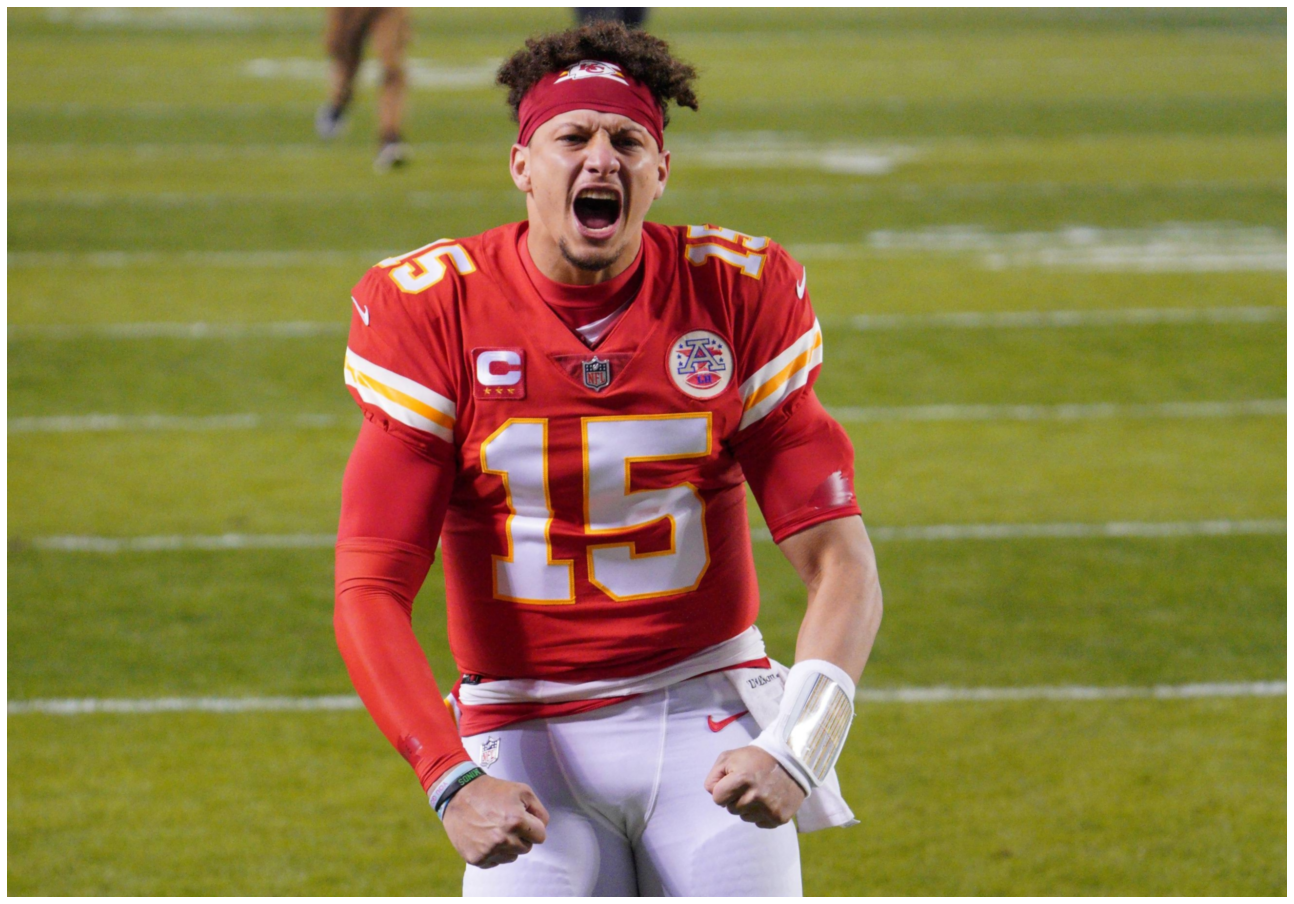

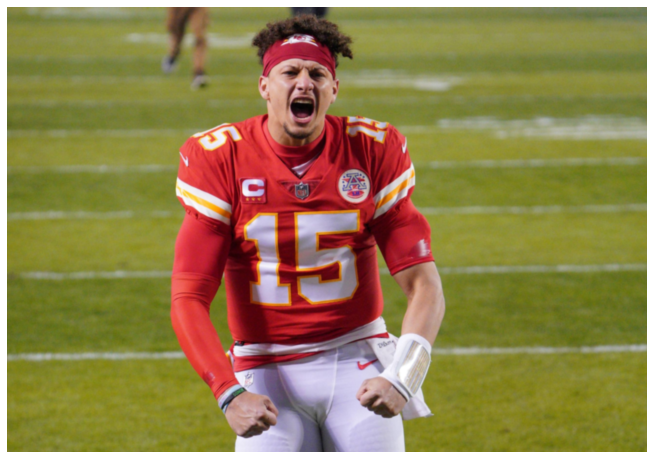

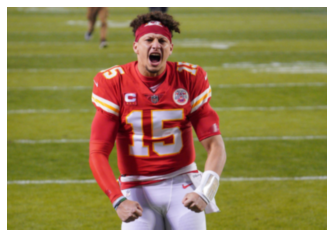

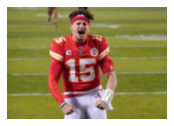

(112, 160, 3)

In [8]:
import matplotlib as mpl

def display_image_in_actual_size(image):

    dpi = mpl.rcParams['figure.dpi']
    height, width, depth = image.shape

    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')

    ax.imshow(image)

    plt.show()

layer = rgb_img.copy()
img_array = [layer]
depth = 4

for i in range(depth):
  layer = cv2.pyrDown(layer)
  display_image_in_actual_size(layer)

import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import pyramid_gaussian


image = data.astronaut()
rows, cols, dim = image.shape
pyramid = tuple(pyramid_gaussian(image, downscale=2, multichannel=True))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

layer.shape

### [35pt] Edge Detection

In this assignment, you need to implement several edge detection algorithm, including sobel edge detection, laplace edge detection, and canny edge detection. For this assignment, OpenCV provide more complete function for edge detection. If you want to get maximum score, you must:
- Implementing Canny Edge Detection
- Implementing Sobel Edge Detection
- Implementing Laplace Edge Detection
- Show the original image
- Show the image after edge detection process

Reference:
- [OpenCV-Canny Edge Detection] https://docs.opencv.org/4.0.1/dd/d1a/group__imgproc__feature.html
- [OpenCV-Laplace Filtering] https://docs.opencv.org/4.0.1/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6
- [OpenCV-Sobel Filtering] https://docs.opencv.org/4.0.1/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d
- [Scipy-Numpy Sobel Edge Detection] http://scipy-lectures.org/advanced/image_processing/auto_examples/plot_find_edges.html

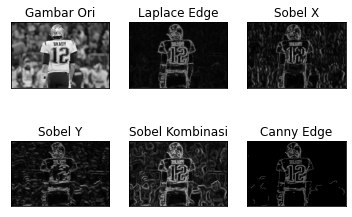

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("pevita.jpg", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize = 3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img, 100, 200)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['Gambar Ori', 'Laplace Edge', 'Sobel X', 'Sobel Y', 'Sobel Kombinasi', 'Canny Edge']
images = [img,lap, sobelX, sobelY, sobelCombined, edges]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

### [35pt] Corner Detection

In this assignment, you need to implement corner detection algorithm, including Harris corner detection and Shi-Thomas corner detection. If you want to get maximum score, you must:
- Implementing Harris corner detection algorithm
- Implementing Shi-Thomas corner detection algorithm
- Show the original image
- Show the features in the image using some mark

Reference:
- [OpenCV-Harris Corner Detection] https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html
- [OpenCV-Shi Thomas Corner Detection] https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html

In [11]:
#Harris Corner Detection
import numpy as np
import cv2 as cv

img = cv.imread("yoi.jpg")
cv.imshow('img', img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv.imshow('Harris Corner', img)

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()


In [12]:
#Shi-Thomas Corner Detection
import numpy as np
import cv2 as cv

img = cv.imread("trevor.jpg")
cv.imshow('img', img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)

for i in corners:
    x, y = i.ravel()
    cv.circle(img, (x, y), 3, 255, -1)

cv.imshow('Shi-Thomas', img)

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()
